# Visualizing Errors

For any scientific measurement, accurate accounting for errors very important. In visualization of data and results, showing these errors effectively can make a plot convey much more information. In this notebook we'll take a look at a few ways of displaying this type of information with Matplotlib.

Let's start by setting up the notebook for plotting, as usual:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Basic Errorbars

Basic errorbars can be created with a single Matplotlib function call:

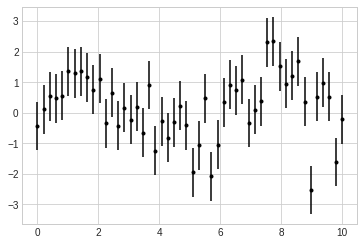

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the `fmt` is format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in `plt.plot`.

In addition to these basic options, the `errorbar` function has many options to customize its output. We could customize the aesthetics of our plot by making the errorbars lighter than the points themselves:

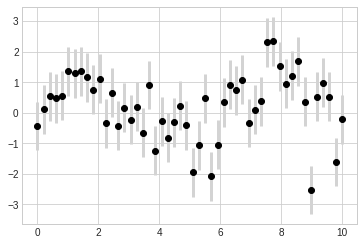

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

There is also the option to specify horizontal errorbars (`xerr`), one-sided errorbars, and many other variants.

## Continuous Errors

In some situations it is desirable to show errorbars on continuous quantities. Though Matplotlib does not have a built-in solution for this type of application, we can implement one of our own by combining primitives like `plt.plot` and `plt.fill_between`.

Here we'll perform a _Gaussian Process regression_ using the Scikit-Learn API and use it as an example:

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel, n_restarts_optimizer=10)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, sigma = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(sigma)  # 2*sigma ~ 95% confidence region

We now have `xfit`, `yfit`, and `dyfit`, which sample the continous fit to our data. We can use the `plt.fill_between` function with a light color to visualize this continuous error:

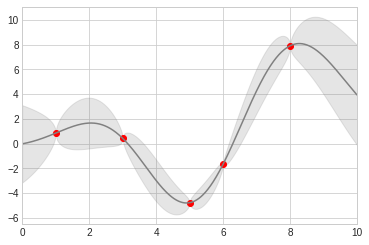

In [5]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

What `fill_between` does here is that after we pass an x value, the lower y-bound and the upper y-bound, the area between these regions is filled.